In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
df = pd.read_csv('titanic_db.csv', index_col = 0)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [4]:
round(df.survived.mean(),2)

# ~ 38% survived, and ~61.6% did not survive

0.38

In [5]:
# use the prep titanic data from prepare.py to prep data

titanic_df = prepare.prep_titanic_data(df)
type(titanic_df)

tuple

In [6]:
#split into train, test, and validate to the titanic_df
train, test, validate = titanic_df

In [7]:
#need to drop columns that are redundant, strings, etc

train = train.drop(columns = ["sex", 'embark_town'])
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [8]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [9]:
# create X & y version of train, where y is a series with just the target variable and 
# X are all the features.

X_train  = train.drop(columns = ["survived"])
y_train = train.survived

X_validate = train.drop(columns = ["survived"])
y_validate = train.survived

X_test = train.drop(columns = ["survived"])
y_test = train.survived

In [10]:
#the baseline is that passengers did not survive, take this from the train df
baseline = y_train.mode()

baseline_prediction = (y_train == 0) #all the instances where did not survive (ie positive case) == True

baseline_accuracy = round(baseline_prediction.mean(),2)
baseline_accuracy

0.62

#### Create the Object

In [11]:
# for classification you can change the algorithm to gini or entropy (information gain)
# default is gini

clf = DecisionTreeClassifier(max_depth = 3, random_state = 123)

#### Fit the Model
- Fit the random forest algorithm to the training data. 

In [12]:
# model.fit(X , y)

clf = clf.fit(X_train, y_train)

#### Visualize a Decision Tree

[Text(446.4, 380.52, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(223.2, 271.8, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(111.6, 163.07999999999998, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(55.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(334.79999999999995, 163.07999999999998, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(279.0, 54.360000000000014, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = 0'),
 Text(669.5999999999999, 271.8, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(558.0, 163.07999999999998, 'age <= 7.835\ngini = 0.184\nsamples = 205\

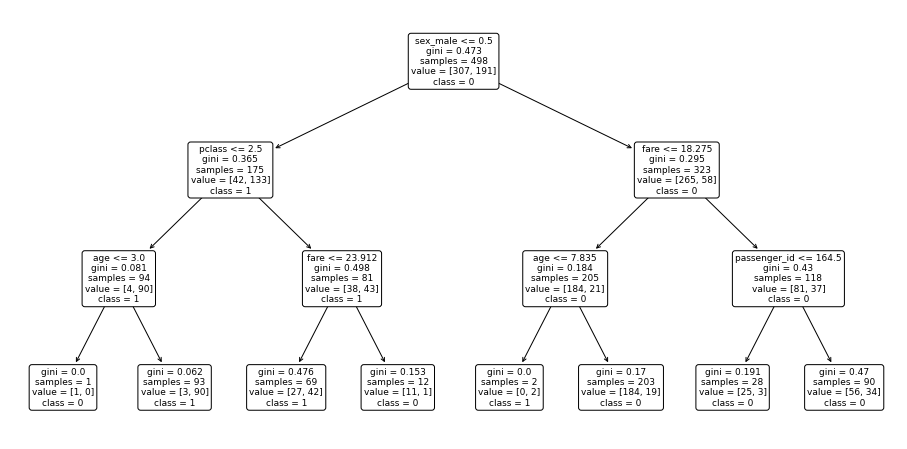

In [13]:
plt.figure(figsize = (16, 8))
plot_tree(clf, feature_names = X_train.columns, class_names = clf.classes_.astype(str), rounded = True)

#### Make Predictions

In [14]:
y_pred = clf.predict(X_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Estimate Probability

In [15]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.62222222, 0.37777778],
       [0.62222222, 0.37777778],
       [0.89285714, 0.10714286],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

## Evaluate Model

#### Compute the Accuracy
- Remember that Accuracy is the number of correct predictions over the number of total instances that have been evaluated. 

In [16]:
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on training set: 0.83


#### Create a confusion matrix

   - True Positive: number of occurrences where y is true and y is predicted true.
   -  True Negative: number of occurrences where y is false and y is predicted false.
   - False Positive: number of occurrences where y is false and y is predicted true.
   - False Negative: number of occurrences where y is true and y is predicted false.


In [17]:
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [18]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [19]:
labels = ['Actually Died', 'Actually Survived']
col_labels = ['Pred. Died', 'Pred. Survived']
pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels, columns = col_labels)

,Pred. Died,Pred. Survived
Actually Died,277,30
Actually Survived,57,134


#### Create a classification report

- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. TP(TP+FP)

- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. TP(TP+FN)

- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better. ∈[0,1]

- Support: number of occurrences of each class in where y is true.


In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [26]:
#as a DF
c_report = classification_report(y_train, y_pred, output_dict = True)
pd.DataFrame(c_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


### Evaluate the Model with our Validate dataset

Compute the accuracy of the model when run on the validate data

   - Because we didn't do exploration or train on validate, it is "out-of-sample".
   - Evaluating on validate means we're learning how well the model does on new data.


In [21]:
print('Accuracy of Decision Tree Classifier on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree Classifier on validate set: 0.83


In [22]:
#Produce y_predictions that come from the X_validate

y_pred = clf.predict(X_validate)

#compare actual y values (from validate) to predicted y_values from the model run on X_validate

print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [28]:
#as a DF
c_report = classification_report(y_validate, y_pred, output_dict = True)
pd.DataFrame(c_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000
